# K-meansクラスタリング：演習課題の解答例

## 準備

In [1]:
# グラフに色をつけるためのライブラリ
library(RColorBrewer)

---
## 演習課題

### 課題1
上で分析した人工データについて，K-meansクラスタリングを何回か実行して，その都度結果がどう変わるかを観察してみてください．実行の度に結果が変わることが確認できるはずですが，その変化がなぜ起こるかのか考察してみてください．

※ 結果の変化の観察は，散布図の色訳がどう変わるかを確認するのが手っ取り早いです．


### 課題2
``data``フォルダに``e-commerce.txt``というファイルを下記コードを実行して読み込んでください．このファイルには，とあるeコマースサイトで
* 書籍
* 衣服
* 化粧品
* 食料品
* 飲料

を1年間で何回購入したかについて，100名の顧客のデータが記録されています．

このデータに対して，K-meansクラスタリングを適用し，100名の顧客データを10グループに分類してください．さらに，分類した各グループの平均的な購買傾向について分析を行ってください．

※ データの出典：[「ビジネスに活かすデータマイニング」という書籍で用いられているサンプルデータ](https://gihyo.jp/book/2014/978-4-7741-6674-2/support)

In [2]:
e_commerce_df <- read.table("data/e-commerce.txt", header=T, sep=" ")

In [3]:
result <- kmeans(e_commerce_df, centers=10)
result

K-means clustering with 10 clusters of sizes 16, 9, 4, 10, 11, 5, 5, 18, 3, 19

Cluster means:
      books    cloths cosmetics    foods   liquors
1  34.25000  7.875000  4.187500 4.375000  4.187500
2  13.77778 16.333333  6.222222 3.666667 10.555556
3   5.50000 22.250000  3.250000 5.000000  2.250000
4  23.00000  2.600000  5.000000 4.700000  4.200000
5  26.63636  9.090909  5.000000 5.181818  9.181818
6   2.00000  6.200000  5.600000 4.800000  9.600000
7  58.80000 13.000000  3.000000 5.600000  5.000000
8  33.33333 19.722222  4.444444 6.166667  7.000000
9  11.33333  6.000000  4.666667 4.666667  2.333333
10 46.15789  9.263158  4.736842 4.578947  4.736842

Clustering vector:
  [1] 10  5  4  1 10  4 10  3 10 10  8  8  5  1  4  2  3  2  9  8  4 10  2  1  3
 [26] 10 10  1  4  7  1  1  6  2  4 10  8  5  8  8  2  1  5  8  7  8  8  8  1  8
 [51]  5  5  7 10  1 10  4  1  5  4  9  5  2  6  2 10  9  6  1 10  2 10  1  6  1
 [76] 10  5  7  5  4  2  8  8  8  8 10  4  6  8 10  1  8  1  7 10  1  8  5  3 10


### 課題3
課題2で用いたデータについて，クラスタ数を1から20まで1ずつ増やしながら，K-meansクラスタリングを実行してください．クラスタリング結果の``between_SS / total_SS``の変化を観察し，業務上有益な分析を行うにはクラスタ数をどの程度に設定すればよさそうか，考察してみてください．

In [4]:
cluster_size <-　as.list(NULL)
fitness_score <-as.list(NULL)

for (cluster_num in 1:20) {
    result <- kmeans(e_commerce_df, centers=cluster_num)
    fitness <-result$betweenss / result$totss
    cluster_size[cluster_num] <- cluster_num
    fitness_score[cluster_num] <- fitness
}

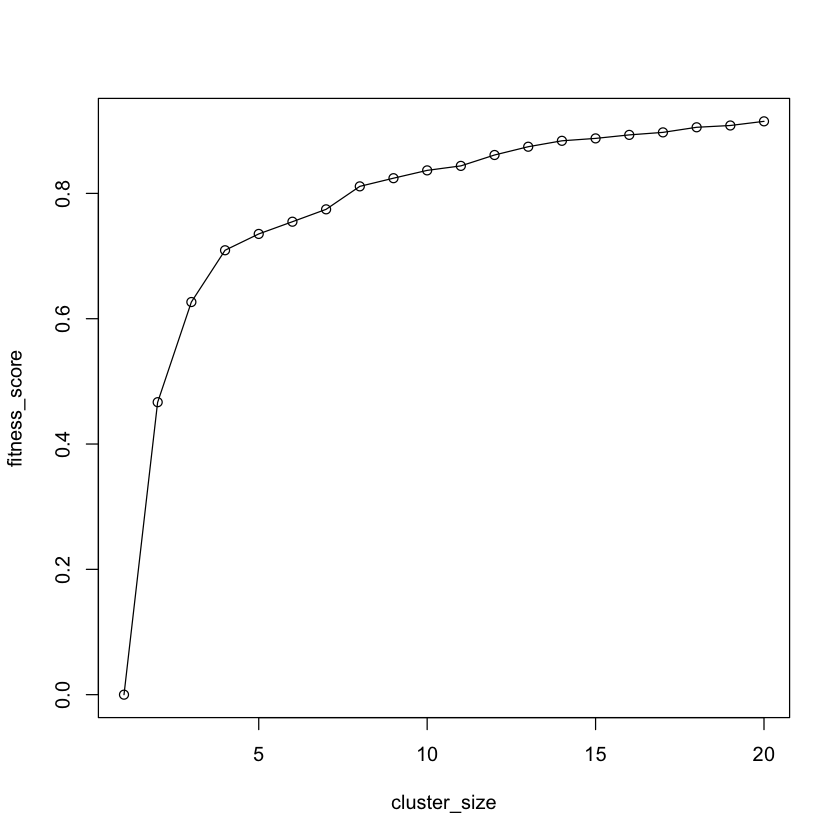

In [5]:
plot(cluster_size, fitness_score, type="o")